In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
# sns设置中文
sns.set(font='SimHei')


# 模型人工神经网络、随机森林、支持向量机svr, XGB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# 标准化
from sklearn.preprocessing import StandardScaler

# 划分数据集
from sklearn.model_selection import train_test_split

# 线性回归评价指标
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [2]:
# 加载data.xlsx
data = pd.read_excel('data.xlsx')
data.head()

,c,Si,Mn,S,P,Cr,Ni,Cu,淬火温度,变形温度,总变形量,冲击实验温度,冲击功
0,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,-100,88
1,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,-60,290
2,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,-20,291
3,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,20,241
4,0.4,0.27,0.2,0.001,0.001,2.01,2.04,0.0,850,500,0.0,0,0


In [4]:
# 1.数据预处理
# 1.1 删除空值
print(data.isnull().sum())
data = data.dropna()

c         0
Si        0
Mn        0
S         0
P         0
Cr        0
Ni        0
Cu        0
淬火温度      0
变形温度      0
总变形量      0
冲击实验温度    0
冲击功       0
dtype: int64


In [5]:
# 1.2 删除重复值
print(data.duplicated().sum())
data = data.drop_duplicates()

11


In [6]:
data.head()

,c,Si,Mn,S,P,Cr,Ni,Cu,淬火温度,变形温度,总变形量,冲击实验温度,冲击功
0,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,-100,88
1,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,-60,290
2,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,-20,291
3,0.4,2.00,0.0,0.000,0.000,1.00,0.00,0.0,850,500,0.7,20,241
4,0.4,0.27,0.2,0.001,0.001,2.01,2.04,0.0,850,500,0.0,0,0


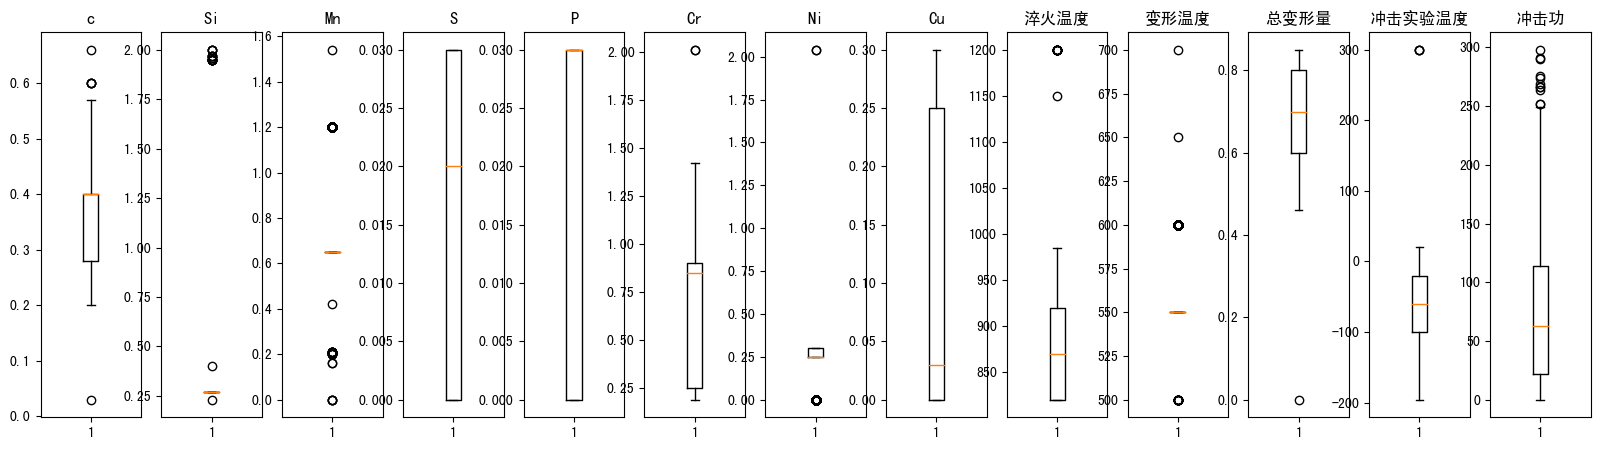

In [10]:
# 2.数据分析
# 2.1 画出每个特征的箱线图
n_cols = data.shape[1]
column_names = data.columns
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(20, 5))
for i in range(n_cols):
    axes[i].boxplot(data[column_names[i]])
    axes[i].set_title(column_names[i])
plt.show()


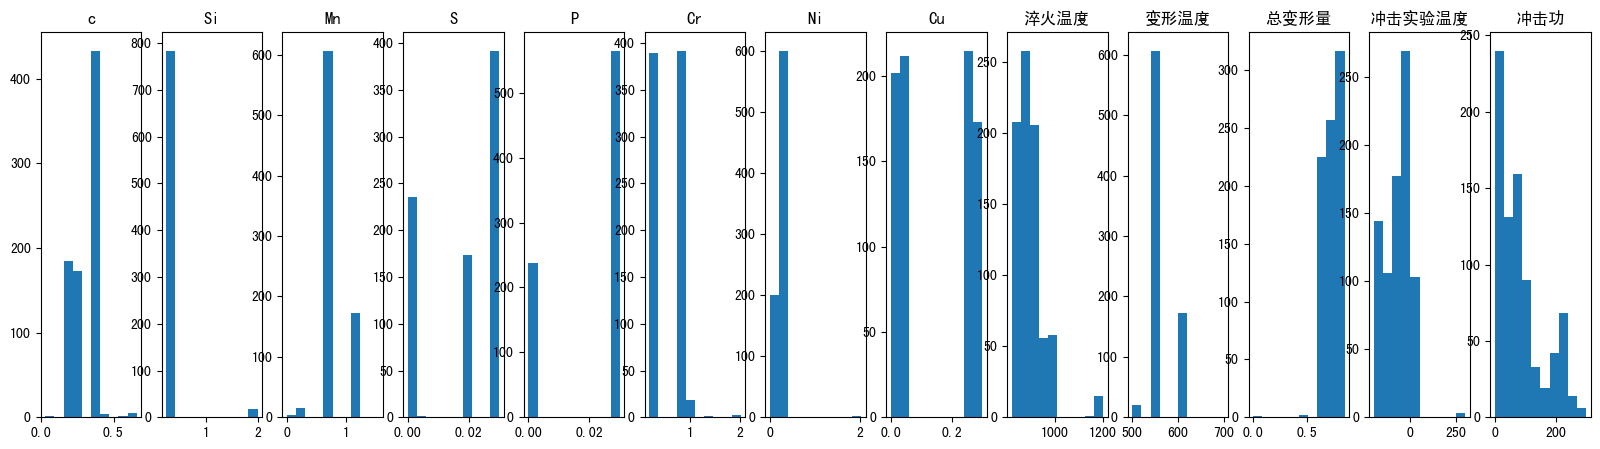

In [11]:
# 2.2 画出每个特征的直方图
n_cols = data.shape[1]
column_names = data.columns
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(20, 5))
for i in range(n_cols):
    axes[i].hist(data[column_names[i]])
    axes[i].set_title(column_names[i])
plt.show()


In [22]:
# 3.数据建模
# 3.1 数据划分
Y = data['冲击功']
X = data.drop(['冲击功'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# 3.2 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
# 3.3 模型训练
# 3.3.1 神经网络
mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, Y_train)
mlp_y_predict = mlp.predict(X_test)
mlp_mae = mean_absolute_error(Y_test, mlp_y_predict)
mlp_mse = mean_squared_error(Y_test, mlp_y_predict)
mlp_r2 = r2_score(Y_test, mlp_y_predict)
print('神经网络MAE：', mlp_mae)
print('神经网络MSE：', mlp_mse)
print('神经网络R2：', mlp_r2)

神经网络MAE： 18.25360089152737
神经网络MSE： 846.3360831947452
神经网络R2： 0.7927311744569179


In [24]:
# 3.3.2 随机森林
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, Y_train)
rf_y_predict = rf.predict(X_test)
rf_mae = mean_absolute_error(Y_test, rf_y_predict)
rf_mse = mean_squared_error(Y_test, rf_y_predict)
rf_r2 = r2_score(Y_test, rf_y_predict)
print('随机森林MAE：', rf_mae)
print('随机森林MSE：', rf_mse)
print('随机森林R2：', rf_r2)


随机森林MAE： 19.072986009479262
随机森林MSE： 893.6169343958796
随机森林R2： 0.7811520314973692


In [25]:
# 3.3.3 支持向量机
svr = SVR(kernel='rbf')
svr.fit(X_train, Y_train)
svr_y_predict = svr.predict(X_test)
svr_mae = mean_absolute_error(Y_test, svr_y_predict)
svr_mse = mean_squared_error(Y_test, svr_y_predict)
svr_r2 = r2_score(Y_test, svr_y_predict)
print('支持向量机MAE：', svr_mae)
print('支持向量机MSE：', svr_mse)
print('支持向量机R2：', svr_r2)

支持向量机MAE： 36.47082292867701
支持向量机MSE： 2423.587462703185
支持向量机R2： 0.4064602266522549


In [38]:
# 3.3.4 XGB
xgb_model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=1000, max_depth=4)
xgb_model.fit(X_train, Y_train)
xgb_y_predict = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(Y_test, xgb_y_predict)
xgb_mse = mean_squared_error(Y_test, xgb_y_predict)
xgb_r2 = r2_score(Y_test, xgb_y_predict)
print('XGB MAE：', xgb_mae)
print('XGB MSE：', xgb_mse)
print('XGB R2：', xgb_r2)



XGB MAE： 18.167867930779547
XGB MSE： 699.0254052163149
XGB R2： 0.8288077542233021


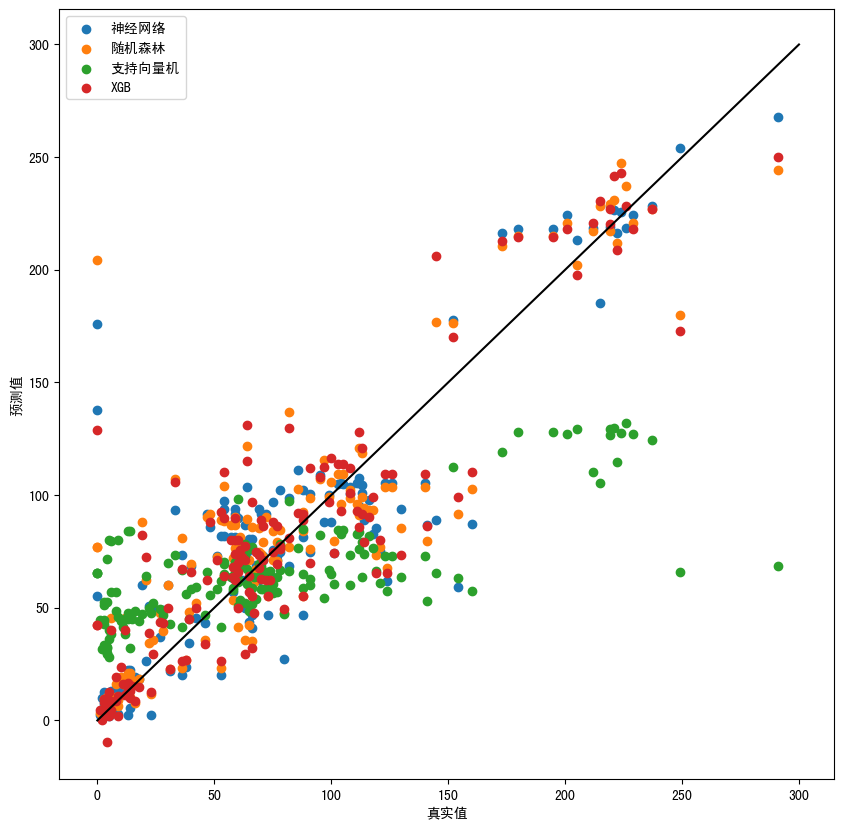

In [44]:
# 4.模型评估
# 4.1 画出预测值与真实值的散点图
plt.figure(figsize=(10, 10))
plt.scatter(Y_test, mlp_y_predict, label='神经网络')
plt.scatter(Y_test, rf_y_predict, label='随机森林')
plt.scatter(Y_test, svr_y_predict, label='支持向量机')
plt.scatter(Y_test, xgb_y_predict, label='XGB')
plt.plot([0, 300], [0, 300], 'black')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.legend()
plt.show()


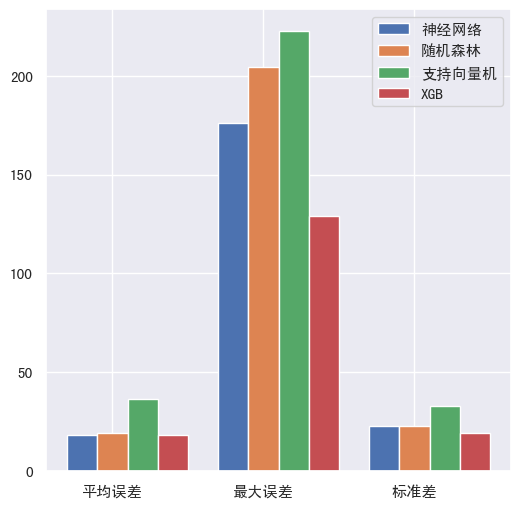

In [63]:
# 4.2 画出预测值与真实值的误差图
plt.figure(figsize=(6, 6))
# 计算平均误差
mlp_error = abs(Y_test - mlp_y_predict)
rf_error = abs(Y_test - rf_y_predict)
svr_error = abs(Y_test - svr_y_predict)
xgb_error = abs(Y_test - xgb_y_predict)

mean_mlp_error = np.mean(mlp_error)
mean_rf_error = np.mean(rf_error)
mean_svr_error = np.mean(svr_error)
mean_xgb_error = np.mean(xgb_error)

# 计算最大误差
max_mlp_error = np.max(mlp_error)
max_rf_error = np.max(rf_error)
max_svr_error = np.max(svr_error)
max_xgb_error = np.max(xgb_error)

# 计算标准差
std_mlp_error = np.std(mlp_error)
std_rf_error = np.std(rf_error)
std_svr_error = np.std(svr_error)
std_xgb_error = np.std(xgb_error)

# 用柱状图表示
# 多列柱状图
plt.bar(x=[0, 1, 2], height=[mean_mlp_error, max_mlp_error, std_mlp_error], width=0.2, label='神经网络')
plt.bar(x=[0.2, 1.2, 2.2], height=[mean_rf_error, max_rf_error, std_rf_error], width=0.2, label='随机森林')
plt.bar(x=[0.4, 1.4, 2.4], height=[mean_svr_error, max_svr_error, std_svr_error], width=0.2, label='支持向量机')
plt.bar(x=[0.6, 1.6, 2.6], height=[mean_xgb_error, max_xgb_error, std_xgb_error], width=0.2, label='XGB')
plt.xticks([0.2, 1.2, 2.2], ['平均误差', '最大误差', '标准差'])
plt.legend()
plt.show()


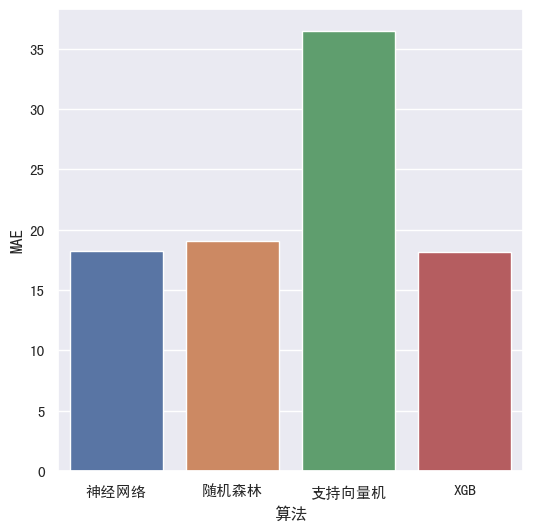

In [51]:
# 4.3 画出算法的评价指标MAE
# 用sns画柱状图
plt.figure(figsize=(6, 6))
sns.barplot(x=['神经网络', '随机森林', '支持向量机', 'XGB'], y=[mlp_mae, rf_mae, svr_mae, xgb_mae])
plt.xlabel('算法')
plt.ylabel('MAE')
plt.show()


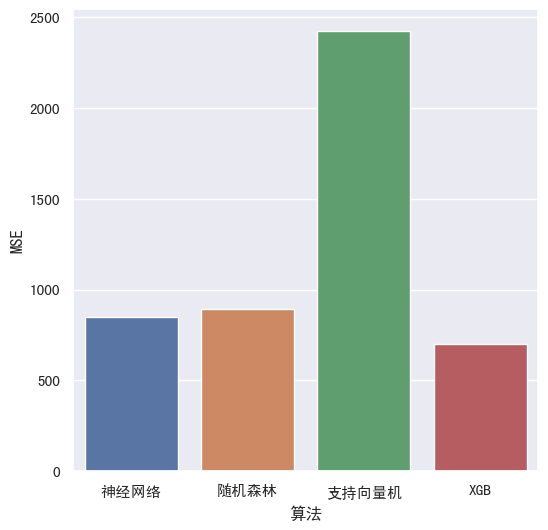

In [52]:
# 4.4 画出算法的评价指标MSE
# 用sns画柱状图
plt.figure(figsize=(6, 6))
sns.barplot(x=['神经网络', '随机森林', '支持向量机', 'XGB'], y=[mlp_mse, rf_mse, svr_mse, xgb_mse])
plt.xlabel('算法')
plt.ylabel('MSE')
plt.show()

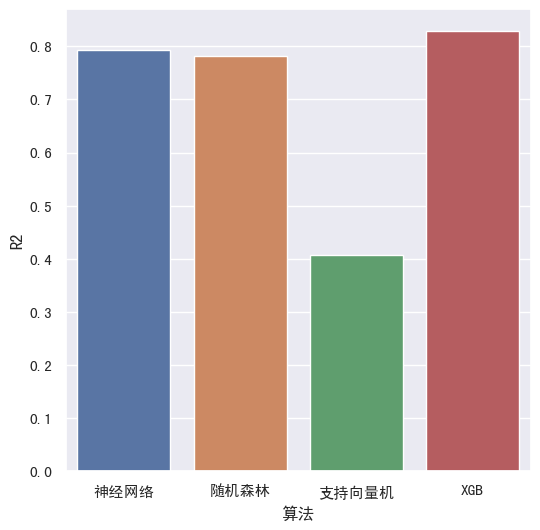

In [53]:
# 4.5 画出算法的评价指标R2
# 用sns画柱状图
plt.figure(figsize=(6, 6))
sns.barplot(x=['神经网络', '随机森林', '支持向量机', 'XGB'], y=[mlp_r2, rf_r2, svr_r2, xgb_r2])
plt.xlabel('算法')
plt.ylabel('R2')
plt.show()
